<a href="https://colab.research.google.com/github/alscop/ESAA-25-2/blob/main/ESAA_YB_week_02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 p.669~698

# 10-3. 시본(Seaborn)

## 시각화를 위한 차트/그래프 유형

- 비즈니스 분석을 위한 시각화  
  - 청중의 유형과 수준 그리고 설득이 필요한 다양한 환경에 따라서 적절하게 여러 가지 차트를 활용하도록 발전
  - 비슷한 데이터 분석 결과를 상황에 따라 여러 차트로 표현

- 통계 분석을 위한 시각화
  - 데이터 자체가 가지는 특성에 좀 더 집중하는 경향
  - 비슷한 유형의 정보는 하나의 시각화 플롯으로만 표현하기도 함.


## 정보의 종류에 따른 시각화 차트 유형


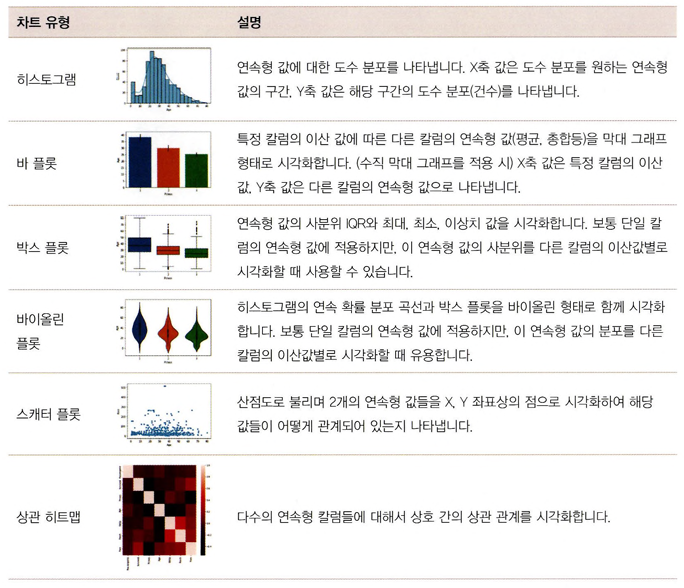


바 플롯: 특정 칼럼의 **이산 값을 기준**으로 다른 칼럼의 연속형 값을 막대 그래프로 시각화. (바 플롯 제외 모든 플롯들이 기본적으로 연속형 칼럼 값에 대한 시각화 지원함. )
히스토그램, 바이올린 플롯: 연속형 데이터의 분포가 **정규 분포인지 왜곡되어 있는지** 시각화  
박스 플롯: 연속형 데이터의 **분위**를 시각화
스캐터 플롯(산점도): 2개의 연속형 칼럼들에 대
한 **분포 및 관계**를 **점**으로 시각화  
상관 히트맵: 다수의 연속형 칼럼들의 **상관 관계**를 온도를 나타내는 **시각적인 컬러 기반**으로 표현

시본: X,Y축으로 구성된 이차원 축에서 데이터 시각화 -> 기본적으로 2개의 변수에 대한 정보 표출  
**hue 인자** 이용/플롯 유형 -> 연속형 데이터의 정보를 다른 이산형 데이터 값으로 세분화된 정보로 표현 가능. 3개의 변수도 함께 정보로 시각화 가능.

## 히스토그램(Histogram)
